cohort analysis automated


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from functools import reduce


In [5]:

file_n = input('how many files do you have? (please input a number)', ) 
files = []
for x in range(int(file_n)):
    files.append(input('file name is?', ) + '.csv')
dfile = []
for y in files:
    z = pd.read_csv(y)
    dfile.append(z)


how many files do you have? (please input a number) 2
file name is? emails
file name is? user_logins


In [ ]:
# brand_metrics['application_acceptance_rate'] = brand_metrics['f2m_accepted_applications']/brand_metrics['f2m_applications']


# mu = brand_metrics['application_acceptance_rate'].mean() #mean
# sigma = brand_metrics['application_acceptance_rate'].std() #standard deviation
# brand_metrics['application_acceptance_rate'] = brand_metrics['application_acceptance_rate'].fillna(mu)


In [ ]:
# alpha = -mu*(sigma**2+mu**2-mu)/sigma**2
# beta = (sigma**2+ mu**2 - mu)*(mu - 1)/sigma**2

In [ ]:
# beta_dist = brand_metrics['application_acceptance_rate'].apply(lambda x: stats.beta.fit(x, alpha, beta))

In [6]:
On = input('what is the name of the column that you want to track on? (defalt: brand_id)', ) or 'brand_id'
# brand_id
df = reduce(lambda x, y: pd.merge(x, y, on = On, how = 'left'), dfile)



what is the name of the column that you want to track on? (defalt: brand_id) id


KeyError: 'id'

In [41]:
df.head()

,brand_id,most_recent_login,joined_dojomojo,list_size,f2m_applications,l2m_applications,f2m_invites,l2m_invites,f2m_accepted_applications,l2m_accepted_applications,...,id,integration_type,details,activated,created_at,updated_at,verified,merge_tags,deleted_at,deleted_token
0,1175,2018-04-09 20:24:27.031000+00:00,2017-02-09 16:35:08.457000+00:00,50,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1176,2017-04-15 18:24:22.649000+00:00,2017-02-10 21:34:22.183000+00:00,1400,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1177,2017-04-24 19:26:08.397000+00:00,2017-02-11 02:59:17.076000+00:00,2500,4.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1178,2018-08-22 21:08:25.648000+00:00,2017-02-11 16:07:27.216000+00:00,150000,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1179,2019-04-15 15:41:04.288000+00:00,2017-02-11 16:16:28.394000+00:00,85000,0.0,0.0,3.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#creating cohort group
login = input('what is the column name of the login time? (default:created_at)', ) or 'created_at'
# created_at

joined = input('what is the column name of the create time of the account? (default: joined_dojomojo) ', ) or 'joined_dojomojo'
# joined_dojomojo

if joined is None:
    joined = 'joined_dojomojo'
cohorts[login]= pd.to_datetime(cohorts[login])
cohorts[joined]= pd.to_datetime(cohorts[joined])

cohorts['cohort_period'] = cohorts.apply(lambda row: round( (row[login] - row[joined]).days / 30, 0), axis=1)
cohorts.sample(10)

what is the column name of the login time? (default:created_at)
what is the column name of the create time of the account? (default: joined_dojomojo) 


,brand_id,created_at,yearmo,most_recent_login,joined_dojomojo,list_size,f2m_applications,l2m_applications,f2m_invites,l2m_invites,f2m_accepted_applications,l2m_accepted_applications,f2m_accepted_invites,l2m_accepted_invites,cohort_period,login_count,ym_joined,ym_login
157627,196.0,2019-02-22 00:00:09.055000+00:00,2019-02,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,19-02
162444,22.0,2019-03-12 13:45:12.100000+00:00,2019-03,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,19-03
104084,31.0,2018-08-01 15:10:07.911000+00:00,2018-08,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,18-08
101909,1846.0,2018-07-24 21:19:32.131000+00:00,2018-07,2018-12-11 00:16:16.327000+00:00,2017-07-26 13:54:21.574000+00:00,51000.0,2.0,0.0,4.0,0.0,1.0,0.0,3.0,0.0,12.0,1,17-07,18-07
185422,2159.0,2019-06-05 15:58:10.004000+00:00,2019-06,2019-06-05 15:58:10.004000+00:00,2017-09-15 17:53:37.814000+00:00,110000.0,0.0,0.0,4.0,13.0,0.0,0.0,1.0,2.0,21.0,1,17-09,19-06
154243,5473.0,2019-02-09 00:16:03.588000+00:00,2019-02,2019-06-15 01:01:51.308000+00:00,2018-09-10 22:51:01.947000+00:00,26000.0,1.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,5.0,1,18-09,19-02
131759,1137.0,2018-11-07 16:55:37.872000+00:00,2018-11,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,18-11
32960,35.0,2017-10-05 18:52:03.236000+00:00,2017-10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,17-10
133765,2283.0,2018-11-14 15:30:29.901000+00:00,2018-11,2019-06-04 14:35:35.604000+00:00,2017-10-03 15:28:54.805000+00:00,75000.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,14.0,1,17-10,18-11
128071,5613.0,2018-10-25 16:37:25.225000+00:00,2018-10,2018-11-01 15:34:41.530000+00:00,2018-09-27 18:34:54.883000+00:00,60000.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1,18-09,18-10


In [43]:
cohorts['login_count'] = 1
cohorts['cohort_period'] = cohorts['cohort_period'].astype(object)

In [44]:
cohorts['ym_joined'] = cohorts[joined].apply(lambda x: x.strftime('%y-%m'))
cohorts['ym_login'] = cohorts[login].apply(lambda x:x.strftime('%y-%m'))
group_size = cohorts.groupby('ym_joined').brand_id.nunique()
df = cohorts.groupby(['ym_joined', 'cohort_period']).brand_id.nunique().unstack()
retention = df.divide(group_size, axis = 0)
retention.sample(10)

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
ym_joined,,,,,,,,,,,,,,,,,,,,,
17-10,0.983957,0.518717,0.347594,0.315508,0.251337,0.245989,0.224599,0.192513,0.203209,0.203209,...,0.117647,0.128342,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-07,1.000000,0.439114,0.225092,0.166052,0.129151,0.147601,0.121771,0.132841,0.132841,0.114391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17-04,1.000000,0.504950,0.386139,0.326733,0.247525,0.227723,0.257426,0.217822,0.207921,0.207921,...,0.118812,0.099010,0.079208,0.108911,0.108911,0.079208,0.099010,0.069307,0.019802,NaN
17-11,0.961864,0.483051,0.309322,0.266949,0.211864,0.228814,0.186441,0.156780,0.165254,0.177966,...,0.063559,0.008475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-11,1.000000,0.430769,0.246154,0.220513,0.174359,0.153846,0.112821,0.076923,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19-03,0.995726,0.388889,0.230769,0.158120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17-02,1.000000,0.531250,0.500000,0.250000,0.156250,0.281250,0.281250,0.250000,0.187500,0.125000,...,0.187500,0.125000,0.125000,0.093750,0.125000,0.125000,0.093750,0.125000,0.093750,0.09375
18-05,1.000000,0.393728,0.202091,0.163763,0.209059,0.170732,0.160279,0.132404,0.128920,0.125436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19-05,1.000000,0.336406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


what is the title you want to give to the table? a


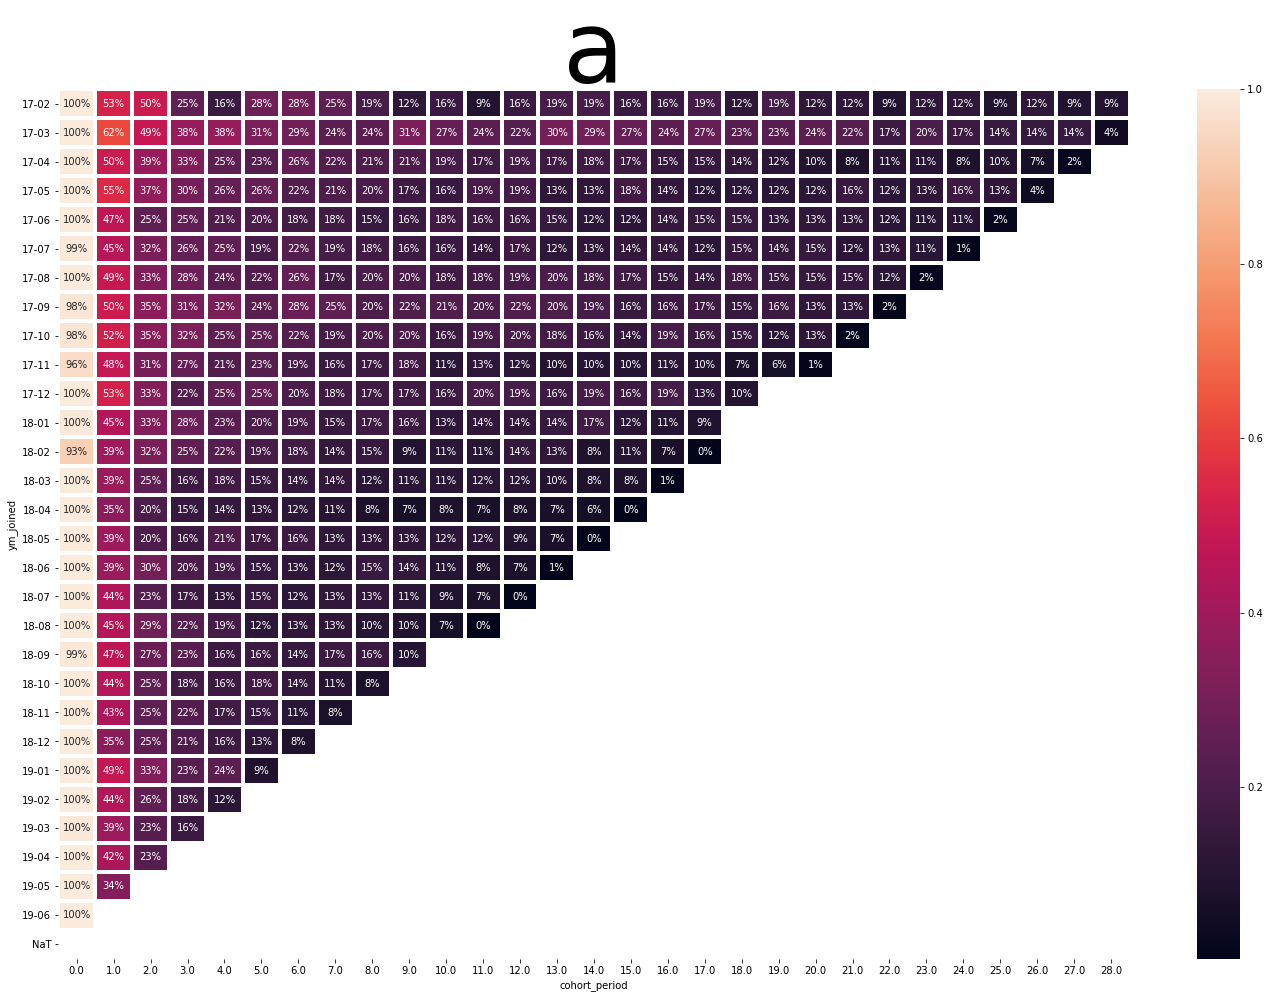

In [50]:
plt.figure(figsize = (24, 16))
ax = plt.axes()
sb.heatmap(retention, annot = True, fmt = '0.0%', linewidths = 3)
title = input('what is the title you want to give to the table? ', )
ax.set_title(title, fontsize = 50)
plt.show()

# Decile

In [59]:
retention.describe()

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
count,29.000000,28.000000,27.000000,26.000000,25.000000,24.000000,23.000000,22.000000,21.000000,20.000000,...,10.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000
mean,0.994080,0.453326,0.302235,0.237477,0.211234,0.192979,0.184919,0.165706,0.160663,0.156086,...,0.142753,0.129070,0.125612,0.109003,0.114453,0.109357,0.097306,0.094378,0.085999,0.069097
std,0.015296,0.066472,0.075625,0.059321,0.059114,0.056296,0.060140,0.047454,0.043754,0.055927,...,0.046212,0.057333,0.055959,0.043429,0.053892,0.058136,0.049468,0.048875,0.062682,0.034864
min,0.926070,0.336406,0.199085,0.151030,0.118110,0.088889,0.081761,0.076923,0.076389,0.068650,...,0.063559,0.008475,0.016043,0.015000,0.016575,0.011364,0.017544,0.038760,0.019802,0.044444
25%,0.995726,0.393545,0.248616,0.187008,0.163522,0.150985,0.134405,0.132513,0.132841,0.113962,...,0.117938,0.124273,0.119318,0.105121,0.107087,0.087184,0.093750,0.061670,0.056776,0.056771
50%,1.000000,0.446763,0.299213,0.232673,0.210526,0.189081,0.181287,0.161723,0.165254,0.160028,...,0.135350,0.129171,0.130000,0.116491,0.113636,0.118056,0.099010,0.097153,0.093750,0.069097
75%,1.000000,0.495022,0.333333,0.276197,0.247525,0.231610,0.223095,0.191260,0.198895,0.184277,...,0.162424,0.144421,0.149171,0.125694,0.128391,0.153343,0.131783,0.129861,0.119097,0.081424
max,1.000000,0.622222,0.500000,0.377778,0.377778,0.311111,0.288889,0.250000,0.244444,0.311111,...,0.233333,0.244444,0.222222,0.166667,0.200000,0.166667,0.144444,0.144444,0.144444,0.093750
